In [2]:
import numpy as np
import pandas as pd
import tqdm
from collections import Counter
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ciphertext-challenge-ii/sample_submission.csv
/kaggle/input/ciphertext-challenge-ii/training.csv
/kaggle/input/ciphertext-challenge-ii/test.csv


In [23]:
train = pd.read_csv('/kaggle/input/ciphertext-challenge-ii/training.csv', index_col='plaintext_id')
test = pd.read_csv('/kaggle/input/ciphertext-challenge-ii/test.csv', index_col='ciphertext_id')
sub = pd.read_csv('/kaggle/input/ciphertext-challenge-ii/sample_submission.csv', index_col='ciphertext_id')

In [26]:
# sample_submission.csv file is weird so re-create it

sub = test.copy()
sub = sub.drop(['ciphertext', 'difficulty'], axis=1)
sub['index'] = 0

sub

,index
ciphertext_id,
ID_4664ddd2f,0
ID_d382d6a99,0
ID_f6479f2ee,0
ID_8e74e7aa9,0
ID_20187e596,0
...,...
ID_ca19c2e32,0
ID_5cc1cf426,0
ID_a5e97aa8a,0


In [5]:
train['length'] = train.text.apply(len)
test['length'] = test.ciphertext.apply(len)

display(train.head())
display(test.head(10))

,text,index,length
plaintext_id,,,
ID_2ed3c75e8,Saying Bambi 2 is better than the original is ...,1228,627
ID_d51637e35,I detest slapstick and even as a child I could...,22903,962
ID_096b6847e,If you want to see a movie about things that w...,44844,525
ID_3f2297975,"The Flesh and the Fiends, also known as Mania,...",10556,2779
ID_9431252bd,I am at a loss of words after watching this on...,18562,894


,ciphertext,difficulty,length
ciphertext_id,,,
ID_4664ddd2f,780 538832 266403 380102 515387 156801 300516 ...,4,15898
ID_d382d6a99,"4V,[[p[z7=b777!z7}77psl777zbJlbQ7Smm4niTDlU[2l...",3,2400
ID_f6479f2ee,}8E U%Weuoc1'8fdsc.:L5DTtKii2RMDV6VpnST264P:[m...,1,1800
ID_8e74e7aa9,551242 107638 511349 230559 411 545081 359978 ...,4,1997
ID_20187e596,N*VV$-C${E$?H=103EH1a7Ov#l=7Gv#l7!o72l#lQ7o!Ol...,1,800
ID_3d589bac8,"M(#44mn7=:SX7}ij7}dlmCz4}4:[e7=l}7paw7L*j!7,}d...",3,800
ID_c82e15dc9,NME-;Xz #!#qe1d?QG./[!b7n!DJ7}4c7P4=i7!27b[y7C...,2,800
ID_84302d1a7,522776 490920 552326 298358 151505 346710 5250...,4,7286
ID_b5e053eca,"ayFGVic#@BG,HyGq?Vds4u,[!2:7b[!b7Qk#!s(7o7k[sc...",2,800


In [6]:
level1 = test[test.difficulty==1].copy()
level2 = test[test.difficulty==2].copy()
level3 = test[test.difficulty==3].copy()
level4 = test[test.difficulty==4].copy()

display(level1.head())
display(level2.head())
display(level3.head())
display(level4.head())

,ciphertext,difficulty,length
ciphertext_id,,,
ID_f6479f2ee,}8E U%Weuoc1'8fdsc.:L5DTtKii2RMDV6VpnST264P:[m...,1,1800
ID_20187e596,N*VV$-C${E$?H=103EH1a7Ov#l=7Gv#l7!o72l#lQ7o!Ol...,1,800
ID_f5670350b,tuey%v.HzU9#!tegGOa7Ql4OOV7O!Wl=7x[!o7z!OCX7il...,1,600
ID_71621a965,"e)'K=(%{!q,xy4OOV(7!xo7[4Q=7xv7=lo,Q!Fl7}[4xo7...",1,1100
ID_92f5ceac5,"%z%zY Xzsbm3Cbmo15c7}%-Mu/6c#):X,K?Y9p[sf!f@%K...",1,700


,ciphertext,difficulty,length
ciphertext_id,,,
ID_c82e15dc9,NME-;Xz #!#qe1d?QG./[!b7n!DJ7}4c7P4=i7!27b[y7C...,2,800
ID_b5e053eca,"ayFGVic#@BG,HyGq?Vds4u,[!2:7b[!b7Qk#!s(7o7k[sc...",2,800
ID_7dd19b1a4,6Wv9X2tS{]hg;8gZI!H*s@QyR%3yO%X?Q8sCMZwEld10l(...,2,600
ID_7734bc735,"wR4;fVUmPN?TTx0yG/icZD]B[ONUmeqXyApxoBv{2c4F1,...",2,1400
ID_22fedb98b,"6UFN}VPAvUXfq@Y2g-Ow;J7K[{8'UHF2w3E0X1""s[!Lp7k...",2,300


,ciphertext,difficulty,length
ciphertext_id,,,
ID_d382d6a99,"4V,[[p[z7=b777!z7}77psl777zbJlbQ7Smm4niTDlU[2l...",3,2400
ID_3d589bac8,"M(#44mn7=:SX7}ij7}dlmCz4}4:[e7=l}7paw7L*j!7,}d...",3,800
ID_ae4bfde20,Jviv4=z7[!7774Cyds7F7!74cl7pa}z!Ba7bE!!SIc7}D(...,3,700
ID_60f79f6a3,"T!P7DkQlDizkssma[b7S774v=DbDlkyC2!,zC47!leniol...",3,1700
ID_b9ed37ef3,"{4Q=,7=nR7wc7S##z=aEz22ajz7J27d2[74Q!B[7=}vGKE...",3,1500


,ciphertext,difficulty,length
ciphertext_id,,,
ID_4664ddd2f,780 538832 266403 380102 515387 156801 300516 ...,4,15898
ID_8e74e7aa9,551242 107638 511349 230559 411 545081 359978 ...,4,1997
ID_84302d1a7,522776 490920 552326 298358 151505 346710 5250...,4,7286
ID_b29049870,185692 413667 462039 539069 411 344009 210960 ...,4,8612
ID_109ff255d,420046 160005 472434 158248 377717 59215 55490...,4,13987


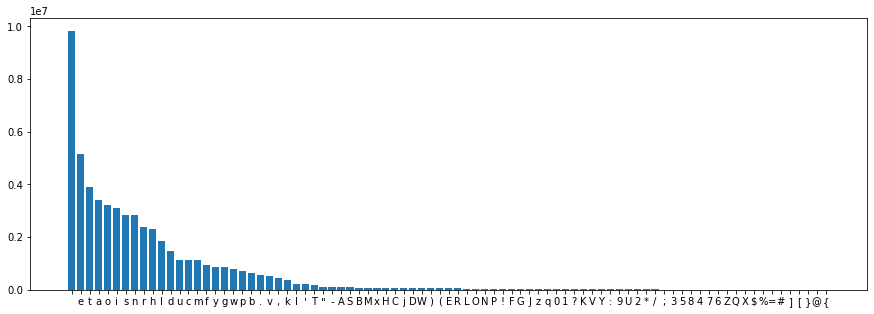

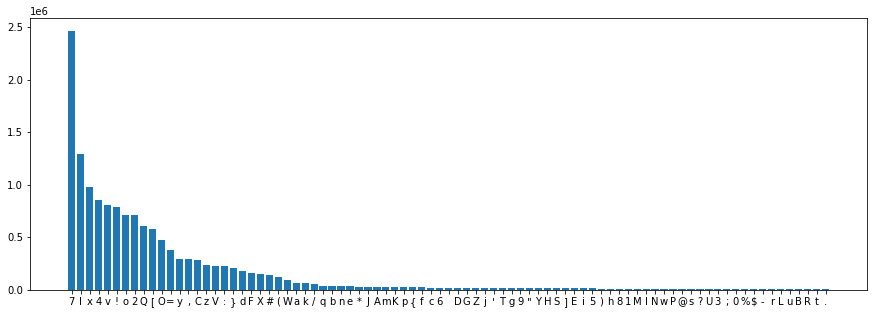

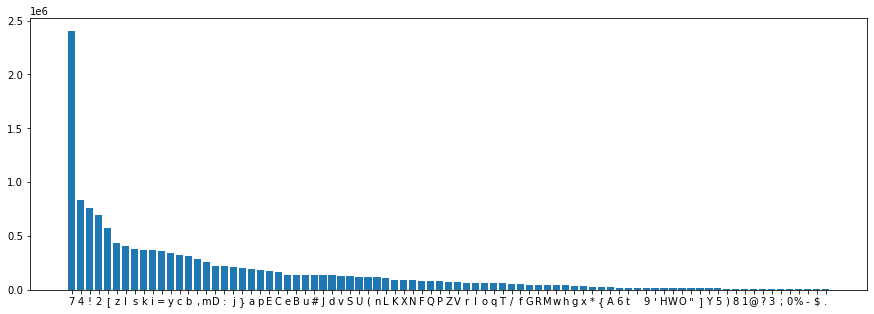

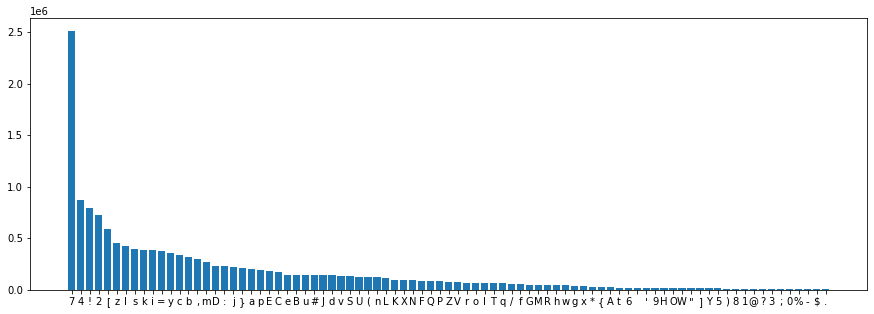

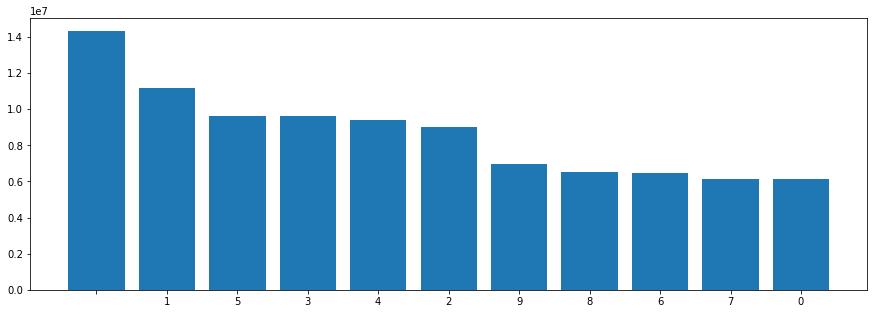

In [7]:
# plaintext
plain_char_cntr = Counter(''.join(train['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level1
plain_char_cntr = Counter(''.join(level1['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level2
plain_char_cntr = Counter(''.join(level2['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level3
plain_char_cntr = Counter(''.join(level3['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level4
plain_char_cntr = Counter(''.join(level4['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# Level 1

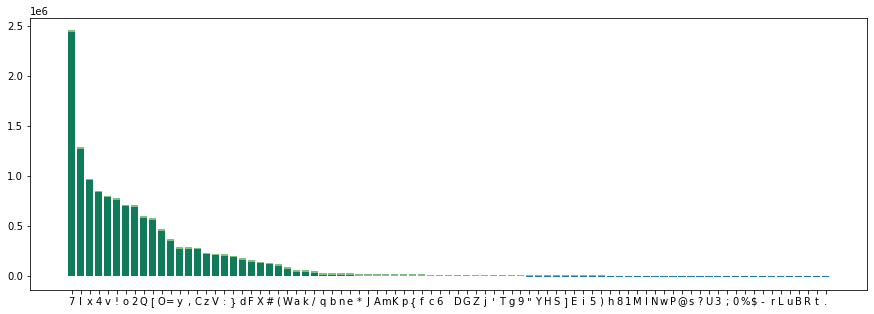

In [8]:
# Plaintext and Level 1

plain_char_cntr = Counter(''.join(train['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

plain_char_test = Counter(''.join(level1['ciphertext'].values))
plain_stats_test = pd.DataFrame([[x[0], x[1]] for x in plain_char_test.items()], columns=['Letter', 'Frequency'])
plain_stats_test = plain_stats_test.sort_values(by='Frequency', ascending=False)
plain_stats_test['Frequency'] -= 21130 # to remove the influence of random padding caracters

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Frequency'].values)
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values//4, alpha=.5,color='green')
plt.xticks(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Letter'].values)
plt.show()

In [9]:
# Solution 1:  1 to 1 mapping
letter = ' etaoisnrhlducmfygwpb.v,kI\'TA"-SEBMxCHDjW)(RLONPGF!Jzq01?KVY:9U2*/3;58476ZQX%$}#@={[]'
key1   = '7lx4v!o2Q[O=y,CzV:}dFX#(Wak/qbne *JAmKp{fc6DGZj\'Tg9"YHS]Ei5)8h1MINwP@s?U3;0%$-rLuBRt.'

def decrypt_level_1(ctext):
    decrypt_mapping = str.maketrans(key1, letter)
    return ctext.translate(decrypt_mapping)

def encrypt_level_1(ptext):
    encrypt_mapping = str.maketrans(letter, key1)
    return ptext.translate(encrypt_mapping)


def test_decrypt_level_1():
    ciphertext = level1.iloc[2]['ciphertext']
    print('- Ciphertxt:\n',ciphertext)
    decrypted = decrypt_level_1(ciphertext)
    print('- Decrypted:\n',decrypted)
    encrypted = encrypt_level_1(decrypted)
    print('- Encrypted:\n',encrypted)
    print("\nEncrypted == Ciphertext:", encrypted == ciphertext)

test_decrypt_level_1() 

- Ciphertxt:
 tuey%v.HzU9#!tegGOa7Ql4OOV7O!Wl=7x[!o7z!OCX7il#!27mvox2lQ742=(7zvQ7x[4x7C4xxlQ(7x[l7}[vOl7,4ox7}4o7vyxox42=!2:X7pl22!o70y4!=7}4o7lA,ldx!v24O742=7oyQlOV7=lolQ#l=7CvQl7Ql,v:2!x!v27zQvC7x[l7,Q!x!,o7x[427[l7Ql,l!#l=X7JV7vF{l,x!v2o7xv7x[l7z!OC7Cyox7Fl7O4!=74x7x[l7=vvQ7vz7i4o=42XXX!x7,vyO=7[4#l7Fll27l=!xl=7}!x[747o[4QdlQ7[42=X7a7y2=lQnox42=7x[l7=lo!Ql7xv7lAd42=7x[l7oxvQV7xv7!xko7zyOOlox7Fyx7C42V7C!2yxlo7,vyO=7[4#l7Fll27,yx7=yQ!2:7x[l7C42[y2x74x7x[l7Q4!O}4V7ox4x!v2742=7x[l7l2=7o,l2lo7=v2l7!27QlxQvodl,x7}lQl2kx72l,loo4QVX7JvQl7,4QlzyO7l=!x!2:7C!:[x7[4#l7o4#l=7x[l7=4V7v2747z!2l7z!OCXixBatVgY7jMMnLgSTd-
- Decrypted:
 [@SuXo]qf7!vi[SFLlI really liked this film. Kevin Costner and, for that matter, the whole cast was outstanding. Dennis Quaid was exceptional and surely deserved more recognition from the critics than he received. My objections to the film must be laid at the door of Kasdan...it could have been edited with a sharper hand. I under-stand the desire to expand the story to 

In [10]:
# Make a dictionary for fast lookup of plaintext
plain_dict = {}
for p_id, row in train.iterrows():
    text = row['text']
    plain_dict[text] = p_id

In [27]:
matched, unmatched = 0, 0

for c_id, row in tqdm.tqdm(level1.iterrows()):
    
    decrypted = decrypt_level_1(row['ciphertext'])
    found = False
    
    for pad in range(100):
        start = pad // 2
        end = len(decrypted) - (pad + 1) // 2
        plain_pie = decrypted[start:end]
        
        if plain_pie in plain_dict:
            p_id = plain_dict[plain_pie]
            row = train.loc[p_id]
            sub.loc[c_id] = train.loc[p_id]['index']
            matched += 1
            found = True
            break
    
    if not found:
        unmatched += 1
            
print(f"Matched {matched}   Unmatched {unmatched}")

11186it [00:10, 1019.90it/s]

Matched 11186   Unmatched 0


In [28]:
print("total:", len(sub))
df_q = sub.query("index != 0")
print("found:", len(df_q), ({len(df_q)/len(sub)}))

sub.to_csv('submit-level-1.csv')
sub

total: 44682
found: 11186 {0.250346895841726}


,index
ciphertext_id,
ID_4664ddd2f,0
ID_d382d6a99,0
ID_f6479f2ee,34184
ID_8e74e7aa9,0
ID_20187e596,22603
...,...
ID_ca19c2e32,0
ID_5cc1cf426,0
ID_a5e97aa8a,0


# Level 2

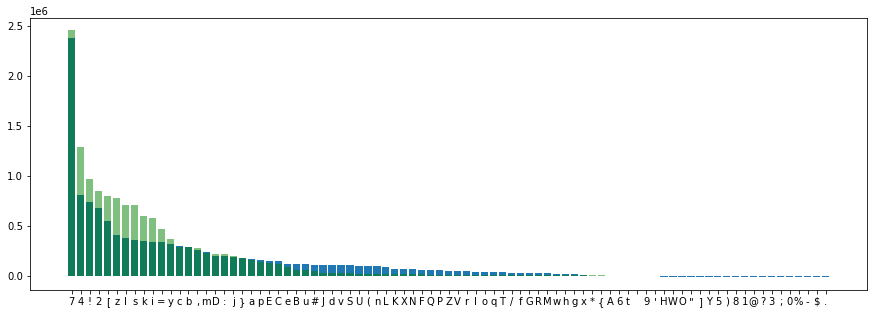

In [13]:
# Train and Level 2
plain_char_cntr = Counter(''.join(train['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

plain_char_test = Counter(''.join(level2['ciphertext'].values))
plain_stats_test = pd.DataFrame([[x[0], x[1]] for x in plain_char_test.items()], columns=['Letter', 'Frequency'])
plain_stats_test = plain_stats_test.sort_values(by='Frequency', ascending=False)
plain_stats_test['Frequency'] -= 21130 # to remove the influence of random padding caracters

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Frequency'].values)
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values//4, alpha=.5,color='green')
plt.xticks(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Letter'].values)
plt.show()

In [14]:
level2['length'].value_counts()

800     1291
700     1282
900      934
1000     791
1100     624
        ... 
6600       1
7500       1
6500       1
7100       1
7900       1
Name: length, Length: 68, dtype: int64

In [15]:
display(level2[level2['length']==7900])

matching_pieces = train[(train['length']>7800)&(train['length']<=7900)]
matching_pieces

,ciphertext,difficulty,length
ciphertext_id,,,
ID_98caefc04,"!,Bf'D ?m.l]HI}*NrNS{KMgs1R%Oq*}Ur.GhOY'""n'uw(...",2,7900


,text,index,length
plaintext_id,,,
ID_f4d572c54,"JAPAN, 1603: A lone warrior races through the ...",27862,7819


In [16]:
p_id = 'ID_f4d572c54'
c_id = 'ID_98caefc04'

plaintext  = train.loc[p_id]['text']
encryptedtext = encrypt_level_1(train.loc[p_id]['text'])
ciphertext = level2.loc[c_id]['ciphertext']

padding = (len(ciphertext)-len(plaintext))//2

print('- Plaintext:\n',plaintext[:35])
print('- Encryptxt:\n',encryptedtext[:35])
print('- Ciphertxt:\n',ciphertext[padding:padding+35])

- Plaintext:
 JAPAN, 1603: A lone warrior races t
- Encryptxt:
 "q'qj(7]3Sw87q7Ov2l7}4QQ!vQ7Q4,lo7x
- Ciphertxt:
 "n'uw(7]3Gl87x7Ci2i7}4UD!jF7X4,zb7u


it does not seems like 1 to 1 mapping (ex. q -> u, x ..)

In [17]:
plaintext = plaintext[:35]
encryptedtext = encryptedtext[:35]
ciphertext = ciphertext[padding:padding+35]

diff_char1 = ""
diff_char2 = ""
for i in range(len(encryptedtext)):
    if encryptedtext[i] != ciphertext[i]:
        diff_char1 += encryptedtext[i]
        diff_char2 += ciphertext[i]

print(diff_char1)
print(diff_char2)

def find_key(cipher2, cipher1, alphabet):
    key = ''
    for i, c in enumerate(cipher2):
        # check if character is in alphabet
        if c in alphabet:
            # get the index of the cipher2 character in the alphabet
            plain_key = alphabet.index(cipher2[i])
            # do the same for the cipher1 character
            enc_key = alphabet.index(cipher1[i])
            # subtract, but make sure we are still inside the alphabet
            newIndex = (plain_key - enc_key) % len(alphabet)
            # return character from alphabet based on subtracted indices
            key += alphabet[newIndex]
            #cntr = (cntr + 1) % key_length
        else:
            key += ""
            
    return key

display(find_key(diff_char2, diff_char1, "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"))

display(find_key(diff_char2, diff_char1, 'aAbBcCdDeEfFgGhHiIjJkKlLmMnNoOpPqQrRsStTuUvVwWxXyYzZ'))

qqjSwqOvlQQvQQlox
nuwGlxCiiUDjFXzbu


'XenOPhONXeNOPhoNX'

'xenophonxenophonx'

It's a Vigenère cipher with key 'xenophon' !!

In [18]:
key2 = 'xenophon'
KEYLEN = len(key2)
alphabet = 'aAbBcCdDeEfFgGhHiIjJkKlLmMnNoOpPqQrRsStTuUvVwWxXyYzZ'

def encrypt_level_2(plaintext):
    cntr = 0
    ciphertext = ''
    for i, c in enumerate(plaintext):
        if c in alphabet:
            charIndex = alphabet.index(c)
            keyIndex = alphabet.index(key2[cntr])
            newIndex = (charIndex + keyIndex) % len(alphabet)
            ciphertext += alphabet[newIndex]
            cntr = (cntr + 1) % KEYLEN
        else:
            ciphertext += c  
    return ciphertext

def decrypt_level_2(ciphertext):
    cntr = 0
    plaintext = ''
    for i, c in enumerate(ciphertext):
        if c in alphabet:
            charIndex = alphabet.index(c)
            keyIndex = alphabet.index(key2[cntr])
            newIndex = (charIndex - keyIndex) % len(alphabet)
            plaintext += alphabet[newIndex]
            cntr = (cntr + 1) % KEYLEN
        else:
            plaintext += c        
    return plaintext


def test_decrypt_level_2():
    ciphertext = level2.iloc[2]['ciphertext']
    print('- Ciphertxt:\n',ciphertext)
    decrypted = decrypt_level_1(decrypt_level_2(ciphertext))
    print('- Decrypted:\n',decrypted)
    encrypted = encrypt_level_2(encrypt_level_1(decrypted))
    print('- Encrypted:\n',encrypted)
    print("\nEncrypted == Ciphertext:", encrypted == ciphertext)

test_decrypt_level_2() 


- Ciphertxt:
 6Wv9X2tS{]hg;8gZI!H*s@QyR%3yO%X?Q8sCMZwEld10l(.7yh7K2i}7u[!s7m!CR7!v7Qy42u74s7ira27J!2=z=(7Svb7!k7c[kfC=72iu7[4#p7Sza27J4=zK7ns747*4kbo427e[!c7m!LG7=!=7=!blnXT7Pi(7Jll7m[sJx#i7:zk7l[a7,[4X4,lyN7zm7*4lR4274VC7}Ds2:B7Xz7!d747J4ckiU7yc,4ss74Ek!lb742=7bz,k2=7ej72i2i7!27syCo7=sny2lpK7/[z7ssEmsUP42,z7kg7*4lP427!l7pNzRkC4DS(7Jll7m[s7zNi,ck!j27!d72cl7k[iUyL7O2s7jm7u[p7k[!2:c7m[4e7Q4Ji7*4bP427:Ea4e7!c7[i}7[i7Ayzsv7clN#!#!2:7bi7n!:[m7e[z72y#iUaz2=!2:7o!:[eL7ws7Uy4C7*4mJ427n427b[scB=7cas7l[!b7Cp,4lca7!eyb7=ihDzdv!2:742=7=!c[y4Nby2!2:7nkX7jlN7d4#iE!ms7[zDsB63aaZM@r(PYoA,H.Ok.,uY0Q{Iwusp59"G6x9Pb1nSgFGv)*6
- Decrypted:
 (O}!HnWRj1I8Z:[m?i7BS5=}RX6e{XG4R:S/b#Nq9AUQt,] NI know this film is meant as open minded, but it should not have been made. As a Bat-fan this film did disturb me, but they've got the character of Batman all wrong. He is a master escape artist and second to none in self defense. The performance of Batman is exemplary, but the execution is not there. One of the things t

In [29]:
matched, unmatched = 0, 0

for c_id, row in tqdm.tqdm(level2.iterrows()):
    decrypted = decrypt_level_1(decrypt_level_2(row['ciphertext']))
    found = False
    
    for pad in range(100):
        start = pad // 2
        end = len(decrypted) - (pad + 1) // 2
        plain_pie = decrypted[start:end]
        
        if plain_pie in plain_dict:
            p_id = plain_dict[plain_pie]
            row = train.loc[p_id]
            sub.loc[c_id] = train.loc[p_id]['index']
            matched += 1
            found = True
            break
    
    if not found:
        unmatched += 1
            
print(f"Matched {matched}   Unmatched {unmatched}")

10966it [00:22, 480.13it/s]

Matched 10966   Unmatched 0


In [30]:
print("total:", len(sub))
df_q = sub.query("index != 0")
print("found:", len(df_q), ({len(df_q)/len(sub)}))

sub.to_csv('submit-level-2.csv')
sub

total: 44682
found: 22151 {0.49574772839174613}


,index
ciphertext_id,
ID_4664ddd2f,0
ID_d382d6a99,0
ID_f6479f2ee,34184
ID_8e74e7aa9,0
ID_20187e596,22603
...,...
ID_ca19c2e32,18412
ID_5cc1cf426,34809
ID_a5e97aa8a,0


# Level 3

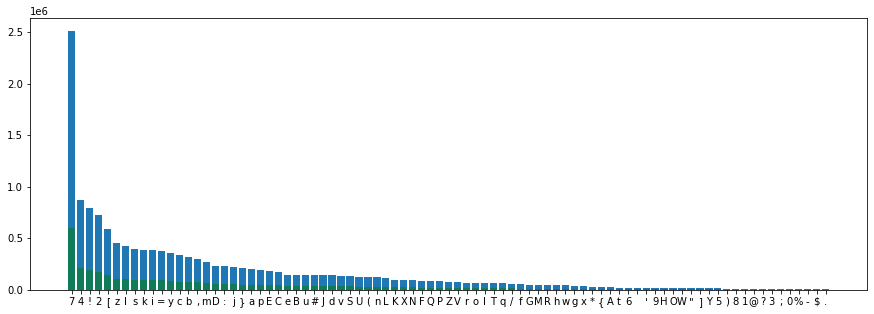

In [33]:
plain_char_cntr = Counter(''.join(level2['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

plain_char_test = Counter(''.join(level3['ciphertext'].values))
plain_stats_test = pd.DataFrame([[x[0], x[1]] for x in plain_char_test.items()], columns=['Letter', 'Frequency'])
plain_stats_test = plain_stats_test.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Frequency'].values)
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values, alpha=.5,color='green')
plt.xticks(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Letter'].values)
plt.show()